In [7]:
import matplotlib.pyplot as plt
%matplotlib nbagg

import thresholdOut_mydemo_paramTuning as my_demo
#from importlib import reload
#reload(my_demo)

## Testing thresholdout with linear regression

The code below runs a simulation of Dwork's thresholdout using a more representative classification task.

Here's what happens when you run it:

1. Generate some random data, and divide it into three equally sized buckets: `training`, `holdout`, and `test`. Eachbucket will have `n` samples of data and dimension `d`.
2. Train L1-regularized logistic regression models with `grid_size` different regularization parameters on the training data. Test each of them on the holdout data, and select the one with either a) the best accuracy on the holdout data or b) the best thresholdout-corrected accuracy on the holdout data.
3. Calculate this selected model's performance on the test dataset
4. Repeat `reps` times

100%|██████████| 50/50 [00:09<00:00,  4.38it/s]


<IPython.core.display.Javascript object>


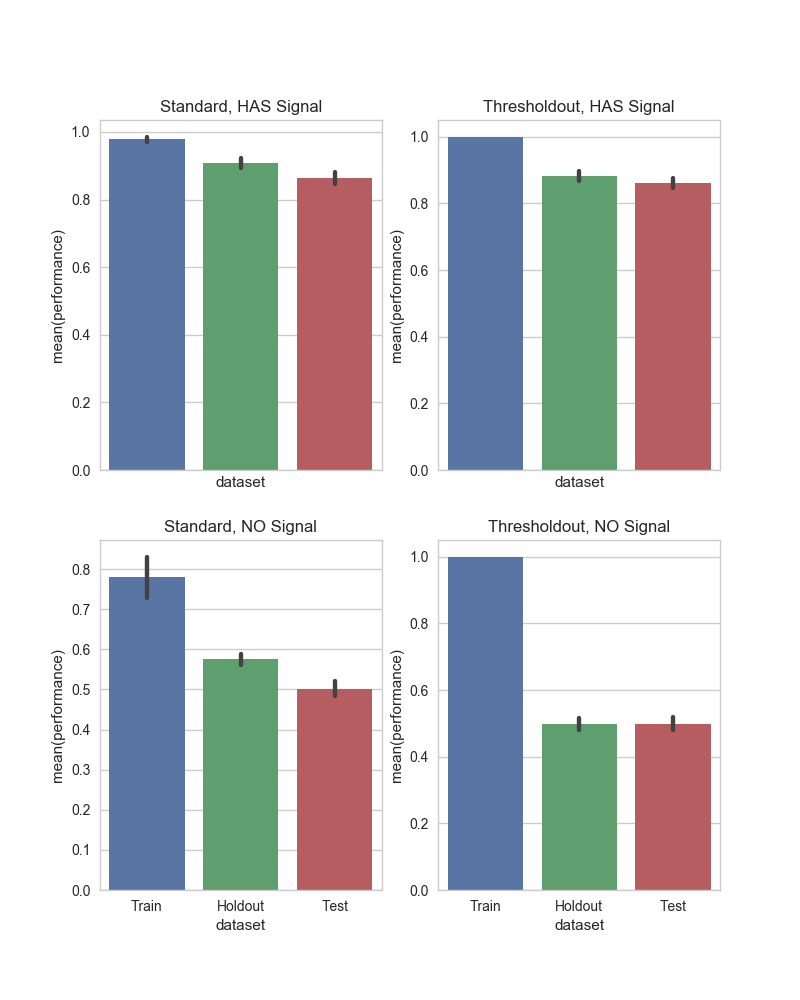

In [13]:
# number of permutations in the experiment
reps = 50

# number of samples per data block, and data dimension
n, d = 50, 500

# number of steps to optimize over in the grid search
grid_size = 100

# thresholdout 'scale' factor
tho_scale = 0.5

f_cls, ax_cls = my_demo.runExpt_and_makePlots(n, d, grid_size, reps, tho_scale=tho_scale, is_classification=True)

### What's that scale factor `tho_scale` about?

Well, the thresholdout method requires a few parameters. I'm not really sure how best to tune them, look at what happens is you set it really big or small in these two analyses.

If it's really big, it still mostly works. However, if it's really small, like the second set of plots, the thresholdout out algorithm doesn't do anything and is indistinguishable from standard holdout methods.

100%|██████████| 50/50 [00:08<00:00,  5.65it/s]


<IPython.core.display.Javascript object>


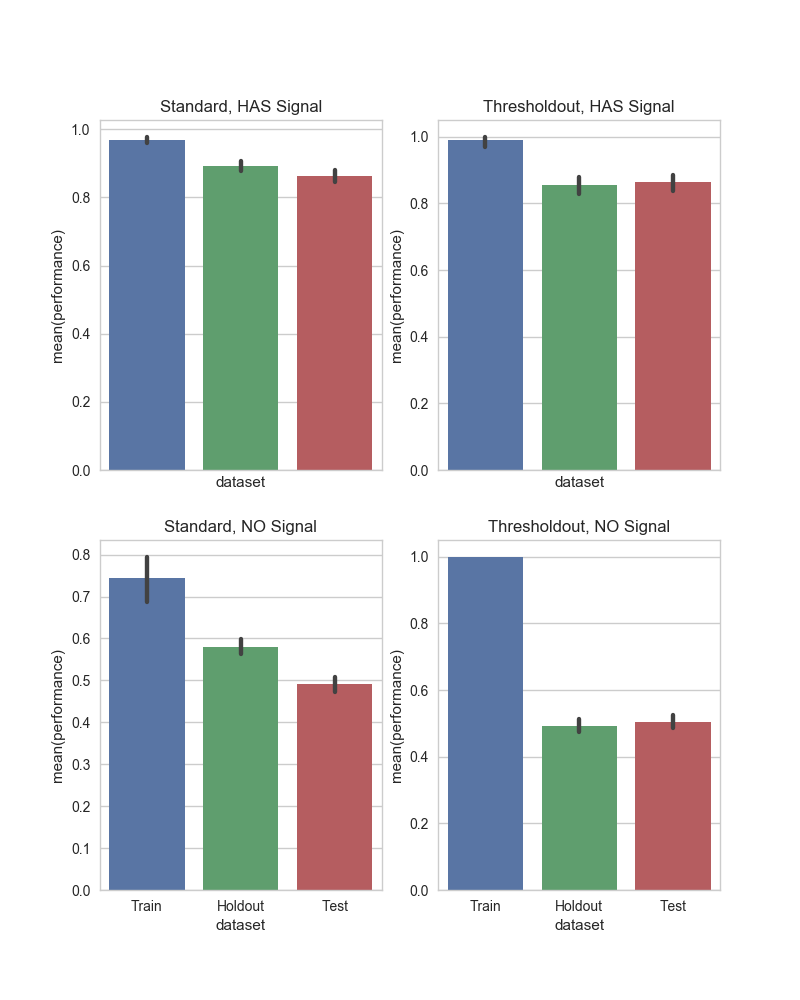

In [9]:
f_cls_bigscale = my_demo.runExpt_and_makePlots(n, d, grid_size, reps, tho_scale=100.0, is_classification=True)

100%|██████████| 50/50 [00:09<00:00,  5.09it/s]


<IPython.core.display.Javascript object>


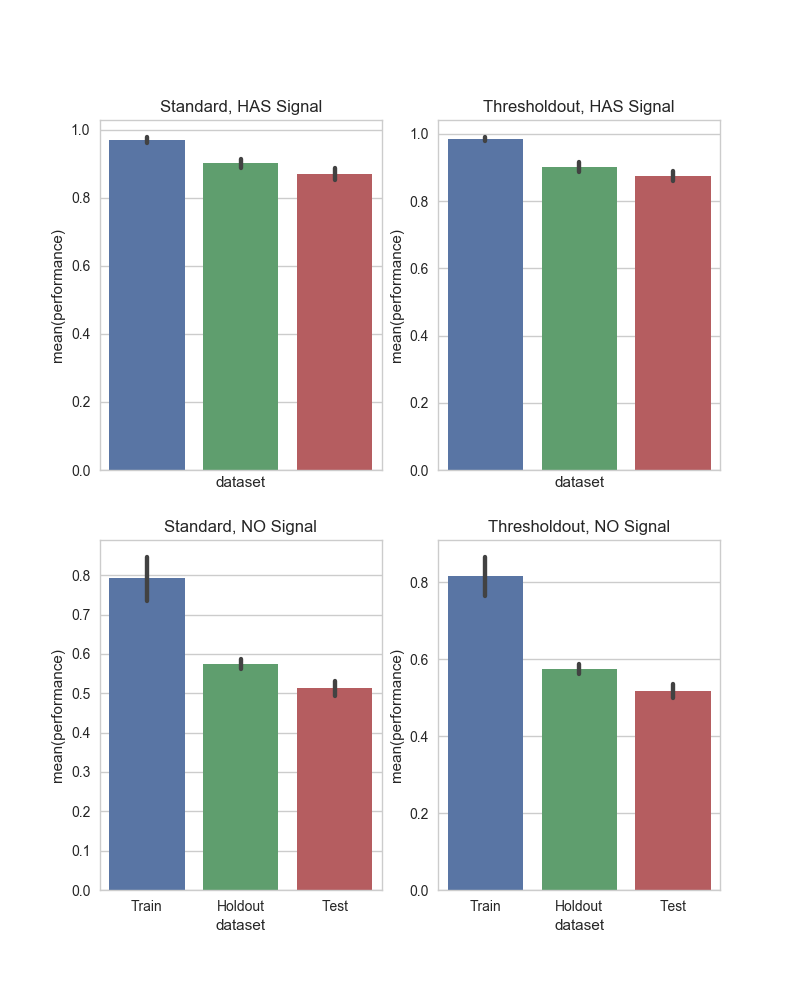

In [10]:
f_cls_smlscale = my_demo.runExpt_and_makePlots(n, d, grid_size, reps, tho_scale=0.00001, is_classification=True)

## How does thresholdout work on linear regression?

Now we switch the model over to an L1-regularized linear regression model and try to predict some normally-distributed outputs. Instead of plugging accuracy values into thresholdout, we're using R^2. A couple of things stick out:

1. There doesn't seem to be much overfitting to the holdout set when there's a real signal, so we can't tell if thresholdout is really doing anything to help reduce it. I should probably engingeer a better test problem that's designed with regression in mind.

2. There must be some sort of bias in how I've normalized data across training/holdout/test becuase in the example with no signal, there's a consistent *negatve* R^2 on the fresh test data rather than zero. The good new is that thresholdout push the performance on the holdout set closer to this actual negative score.

100%|██████████| 50/50 [00:57<00:00,  1.16s/it]


<IPython.core.display.Javascript object>


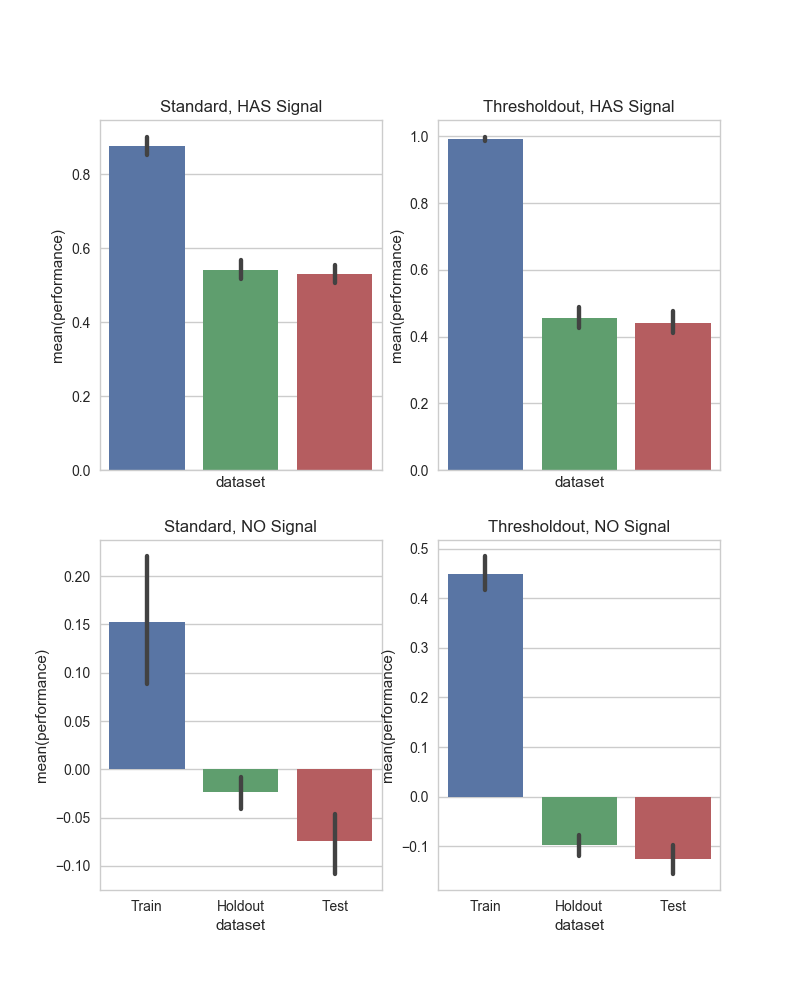

In [11]:
reps = 50
n, d = 50, 500
grid_size = 100

tho_scale = 0.5

f_cls, ax_cls = my_demo.runExpt_and_makePlots(n, d, grid_size, reps, tho_scale=tho_scale, is_classification=False)